# 💰 Analisi Retributiva e Pay Equity

Analisi stipendi, gender pay gap e correlazioni retributive.

**Data creazione**: 18/07/2025

---

In [ ]:
# 📁 SETUP E CARICAMENTO DATI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione grafici
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

# Carica dati con encoding corretto
try:
    df = pd.read_csv('hr_data_con_turnover.csv', encoding='utf-8')
    print(f"Dataset caricato: {len(df)} dipendenti")
    
    # Converti date
    date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
    
    # Calcola età e anzianità
    oggi = pd.Timestamp.now()
    if 'DateOfBirth' in df.columns:
        eta_days = (oggi - df['DateOfBirth']).dt.days
        df['Eta'] = (eta_days / 365.25).round().astype('Int64')
    
    if 'HiringDate' in df.columns:
        servizio_days = (oggi - df['HiringDate']).dt.days
        df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
    
    print("Dati preparati per l'analisi!")
    
except UnicodeDecodeError:
    # Fallback con encoding diverso
    try:
        df = pd.read_csv('hr_data_con_turnover.csv', encoding='latin-1')
        print(f"Dataset caricato con encoding latin-1: {len(df)} dipendenti")
        # Ripeti la preparazione dati
        date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
        oggi = pd.Timestamp.now()
        if 'DateOfBirth' in df.columns:
            eta_days = (oggi - df['DateOfBirth']).dt.days
            df['Eta'] = (eta_days / 365.25).round().astype('Int64')
        if 'HiringDate' in df.columns:
            servizio_days = (oggi - df['HiringDate']).dt.days
            df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
        print("Dati preparati per l'analisi!")
    except:
        print("Errore nel caricamento del dataset")
        df = None
except Exception as e:
    print(f"Errore: {e}")
    df = None

Dataset caricato: 250 dipendenti
Dati preparati per l'analisi!


In [ ]:

# 📁 Importazione dati dal dashboard principale
# Esegui prima il dashboard principale per caricare i dati

try:
    # Verifica se i dati sono già caricati
    if 'df' in globals():
        print(f"✅ Dati già disponibili: {len(df)} dipendenti")
    else:
        # Carica i dati direttamente
        exec(open('carica_dati_hr.py').read())
        print(f"✅ Dati caricati: {len(df)} dipendenti")
except:
    print("⚠️  Esegui prima il dashboard principale (00_HR_Dashboard_Principale.ipynb)")
    print("   oppure carica manualmente i dati HR")


✅ Dati già disponibili: 250 dipendenti



## 💰 Analisi Gender Pay Gap

Analisi dettagliata delle differenze retributive per genere.


In [ ]:

# 💰 ANALISI GENDER PAY GAP
if df is not None and 'Salary' in df.columns:
    print("💰 ANALISI RETRIBUTIVA - GENDER PAY GAP")
    print("=" * 45)
    
    df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    if 'Gender' in df_analisi.columns:
        # Statistiche per genere
        salary_by_gender = df_analisi.groupby('Gender')['Salary'].agg(['mean', 'median', 'std', 'count'])
        
        print("📊 **STATISTICHE RETRIBUTIVE PER GENERE:**")
        for gender in ['M', 'F']:
            if gender in salary_by_gender.index:
                stats = salary_by_gender.loc[gender]
                gender_label = "🚹 Uomini" if gender == 'M' else "🚺 Donne"
                print(f"\n   {gender_label}:")
                print(f"      • Media: €{stats['mean']:,.0f}")
                print(f"      • Mediana: €{stats['median']:,.0f}")
                print(f"      • Dipendenti: {stats['count']:,}")
        
        # Calcola gender pay gap
        if 'M' in salary_by_gender.index and 'F' in salary_by_gender.index:
            salary_m = salary_by_gender.loc['M', 'mean']
            salary_f = salary_by_gender.loc['F', 'mean']
            gap_abs = salary_m - salary_f
            gap_pct = (gap_abs / salary_m) * 100
            
            print(f"\n⚖️  **GENDER PAY GAP:**")
            print(f"   • Gap assoluto: €{gap_abs:,.0f}")
            print(f"   • Gap percentuale: {gap_pct:.1f}%")
            
            if gap_pct > 20:
                print(f"   🚨 **GAP CRITICO**: Differenza superiore al 20%")
                print(f"      → Audit retributivo URGENTE necessario")
            elif gap_pct > 10:
                print(f"   ⚠️  **GAP SIGNIFICATIVO**: Azione correttiva necessaria")
            elif gap_pct > 5:
                print(f"   📋 **GAP MODERATO**: Monitoraggio continuo")
            else:
                print(f"   ✅ **GAP CONTENUTO**: Situazione accettabile")
        
        # Analisi per dipartimento
        if 'Department' in df_analisi.columns:
            print(f"\n🏢 **PAY GAP PER DIPARTIMENTO:**")
            
            for dept in df_analisi['Department'].unique():
                dept_df = df_analisi[df_analisi['Department'] == dept]
                if len(dept_df) > 5:  # Solo dipartimenti con almeno 5 dipendenti
                    dept_gender = dept_df.groupby('Gender')['Salary'].mean()
                    if 'M' in dept_gender.index and 'F' in dept_gender.index:
                        dept_gap = (dept_gender['M'] - dept_gender['F']) / dept_gender['M'] * 100
                        gap_icon = "🚨" if dept_gap > 25 else "⚠️" if dept_gap > 15 else "📊" if dept_gap > 5 else "✅"
                        print(f"   {gap_icon} {dept}: {dept_gap:.1f}% gap")


💰 ANALISI RETRIBUTIVA - GENDER PAY GAP
📊 **STATISTICHE RETRIBUTIVE PER GENERE:**

   🚹 Uomini:
      • Media: €44,621
      • Mediana: €44,520
      • Dipendenti: 105.0

   🚺 Donne:
      • Media: €37,897
      • Mediana: €38,491
      • Dipendenti: 45.0

⚖️  **GENDER PAY GAP:**
   • Gap assoluto: €6,723
   • Gap percentuale: 15.1%
   ⚠️  **GAP SIGNIFICATIVO**: Azione correttiva necessaria

🏢 **PAY GAP PER DIPARTIMENTO:**
   📊 Produzione: 9.3% gap
   📊 IT: 14.0% gap
   📊 Amministrazione: 9.6% gap
   ⚠️ Vendite: 23.1% gap



## 📈 Correlazione Anzianità-Stipendio

Analisi della relazione tra esperienza e retribuzione.


📈 ANALISI CORRELAZIONE ANZIANITÀ-STIPENDIO
📊 **CORRELAZIONE ANZIANITÀ-STIPENDIO:**
   • Coefficiente di correlazione: -0.049
   🚨 **CORRELAZIONE MOLTO DEBOLE**: Sistema retributivo da rivedere

💰 **STIPENDIO MEDIO PER ANZIANITÀ:**
   • Junior (6-10 anni): €42,463
   • Senior (11-20 anni): €42,717


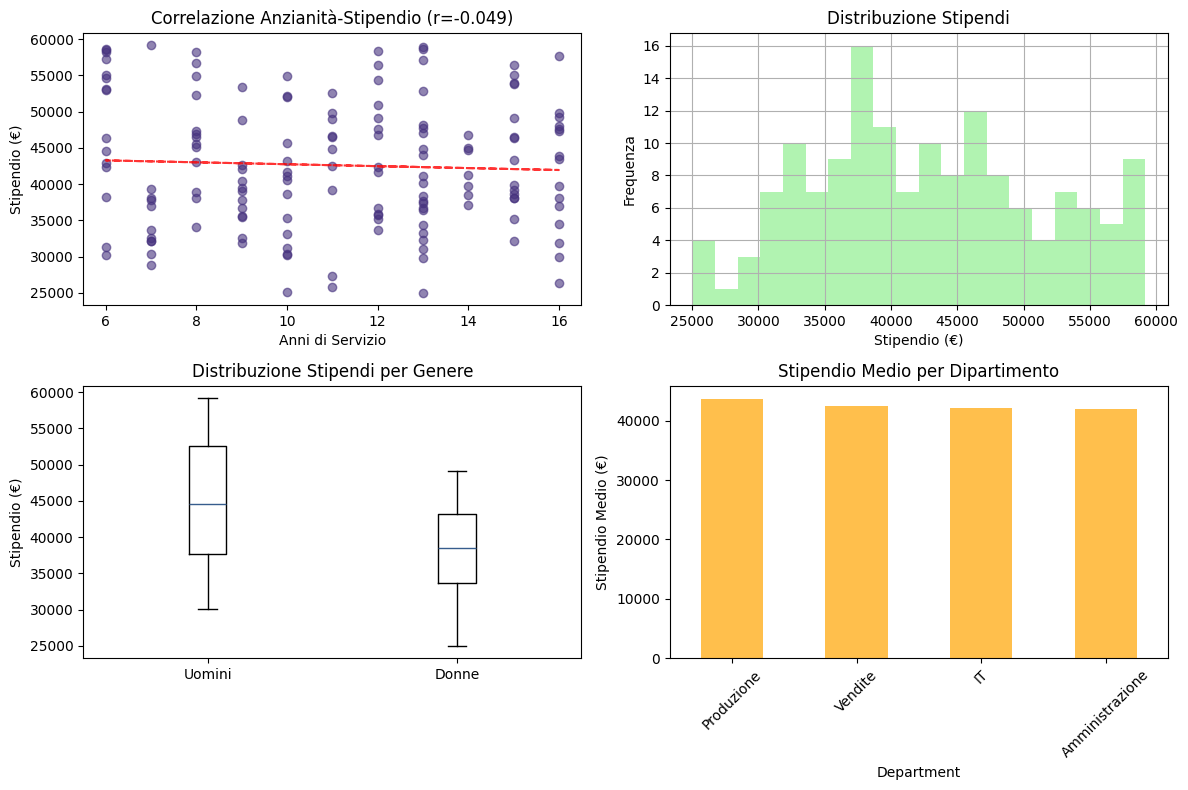

In [ ]:

# 📈 CORRELAZIONE ANZIANITÀ-STIPENDIO
if df is not None and 'Salary' in df.columns and 'AnniServizio' in df.columns:
    
    print("📈 ANALISI CORRELAZIONE ANZIANITÀ-STIPENDIO")
    print("=" * 50)
    
    df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    # Calcola correlazione
    correlazione = df_analisi['AnniServizio'].corr(df_analisi['Salary'])
    
    print(f"📊 **CORRELAZIONE ANZIANITÀ-STIPENDIO:**")
    print(f"   • Coefficiente di correlazione: {correlazione:.3f}")
    
    if correlazione > 0.7:
        print(f"   ✅ **CORRELAZIONE FORTE**: Ottima progressione retributiva")
    elif correlazione > 0.5:
        print(f"   📊 **CORRELAZIONE MODERATA**: Buona progressione")
    elif correlazione > 0.3:
        print(f"   ⚠️  **CORRELAZIONE DEBOLE**: Rivedere politiche di avanzamento")
    else:
        print(f"   🚨 **CORRELAZIONE MOLTO DEBOLE**: Sistema retributivo da rivedere")
    
    # Analisi per fasce di anzianità
    fasce_anzianita = {
        'Nuovi (0-5 anni)': df_analisi[df_analisi['AnniServizio'] <= 5]['Salary'].mean(),
        'Junior (6-10 anni)': df_analisi[(df_analisi['AnniServizio'] > 5) & (df_analisi['AnniServizio'] <= 10)]['Salary'].mean(),
        'Senior (11-20 anni)': df_analisi[(df_analisi['AnniServizio'] > 10) & (df_analisi['AnniServizio'] <= 20)]['Salary'].mean(),
        'Veterani (> 20 anni)': df_analisi[df_analisi['AnniServizio'] > 20]['Salary'].mean()
    }
    
    print(f"\n💰 **STIPENDIO MEDIO PER ANZIANITÀ:**")
    for fascia, stipendio in fasce_anzianita.items():
        if not pd.isna(stipendio):
            print(f"   • {fascia}: €{stipendio:,.0f}")
    
    # Visualizzazione scatter plot
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.scatter(df_analisi['AnniServizio'], df_analisi['Salary'], alpha=0.6)
    plt.xlabel('Anni di Servizio')
    plt.ylabel('Stipendio (€)')
    plt.title(f'Correlazione Anzianità-Stipendio (r={correlazione:.3f})')
    
    # Linea di tendenza
    z = np.polyfit(df_analisi['AnniServizio'], df_analisi['Salary'], 1)
    p = np.poly1d(z)
    plt.plot(df_analisi['AnniServizio'], p(df_analisi['AnniServizio']), "r--", alpha=0.8)
    
    # Distribuzione stipendi
    plt.subplot(2, 2, 2)
    df_analisi['Salary'].hist(bins=20, alpha=0.7, color='lightgreen')
    plt.xlabel('Stipendio (€)')
    plt.ylabel('Frequenza')
    plt.title('Distribuzione Stipendi')
    
    # Boxplot per genere
    if 'Gender' in df_analisi.columns:
        plt.subplot(2, 2, 3)
        gender_data = [df_analisi[df_analisi['Gender'] == 'M']['Salary'].dropna(),
                      df_analisi[df_analisi['Gender'] == 'F']['Salary'].dropna()]
        plt.boxplot(gender_data, labels=['Uomini', 'Donne'])
        plt.ylabel('Stipendio (€)')
        plt.title('Distribuzione Stipendi per Genere')
    
    # Top dipartimenti per stipendio
    if 'Department' in df_analisi.columns:
        plt.subplot(2, 2, 4)
        dept_salary = df_analisi.groupby('Department')['Salary'].mean().sort_values(ascending=False).head(6)
        dept_salary.plot(kind='bar', color='orange', alpha=0.7)
        plt.ylabel('Stipendio Medio (€)')
        plt.title('Stipendio Medio per Dipartimento')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
